# Part 1 : Read and explore data
1. Import pandas library
2. Read the data from sales_data_na.csv
3. Print the shape

In [1]:
# Import pandas 
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt

# Import numpy
import numpy as np

# Use pandas to read in sales_data_na.csv
sales_data_na = pd.read_csv('sales_data_na.csv')

# Print the shape
print(sales_data_na.shape)

# print(sales_data_na)
sales_data_na.head()

(113037, 18)


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,NaN,8,45.0,120.0,590.0,NaN,950.0
1,11/26/2015,26,NaN,2015,19.0,NaN,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,NaN,590.0,360.0,950.0
2,3/23/2014,23,March,2014,NaN,Adults (35-64),M,Australia,NaN,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45.0,120.0,1366.0,1035.0,NaN
3,3/23/2016,23,March,2016,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45.0,120.0,1188.0,900.0,2088.0
4,5/15/2014,15,May,2014,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45.0,120.0,238.0,180.0,418.0


# Part 2 : Exploring the data

1. Print the data types of each column
2. Print Summary Statistics
3. Summary statistics for all columns that aren't of type object.

In [2]:
# Print .dtypes
print(sales_data_na.dtypes)

# Exclude data of type object
sales_data_na.describe(exclude=['object'])

# print(sales_data_na)
sales_data_na.head(2)

Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age        float64
Age_Group            object
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Product              object
Order_Quantity        int64
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
dtype: object


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,NaN,8,45.0,120.0,590.0,NaN,950.0
1,11/26/2015,26,NaN,2015,19.0,NaN,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,NaN,590.0,360.0,950.0


In [3]:
# Revenue value is not correctly calculated

# Create a new column name 'New_Revenue' with correct value
New_Revenue= sales_data_na['Order_Quantity'] * sales_data_na['Unit_Price']
sales_data_na['New_Revenue'] = New_Revenue
sales_data_na.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,New_Revenue
0,11/26/2013,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,NaN,8,45.0,120.0,590.0,NaN,950.0,960.0
1,11/26/2015,26,NaN,2015,19.0,NaN,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,NaN,590.0,360.0,950.0,NaN


In [4]:
# Since the Revenue column is not correctly calculated so dropped the Revenue column

sales_data_na = sales_data_na.drop('Revenue',axis=1)

In [5]:
# Renamed the new column as Revenue

sales_data_na = sales_data_na.rename(columns = {'New_Revenue':'Revenue'})
sales_data_na.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,NaN,8,45.0,120.0,590.0,NaN,960.0
1,11/26/2015,26,NaN,2015,19.0,NaN,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,NaN,590.0,360.0,NaN


In [6]:
# Since the Revenue value changed, this affected the Profit column value
# Same step as Revenue

# Create new column for Profit
New_Profit= sales_data_na['Revenue'] - sales_data_na['Cost']

# Insert the new column beside the existing Profit column
sales_data_na.insert(loc = 15,column = 'New_Profit', value = New_Profit)
sales_data_na.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,New_Profit,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,NaN,8,45.0,120.0,NaN,590.0,NaN,960.0
1,11/26/2015,26,NaN,2015,19.0,NaN,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,NaN,NaN,590.0,360.0,NaN
2,3/23/2014,23,March,2014,NaN,Adults (35-64),M,Australia,NaN,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45.0,120.0,1725.0,1366.0,1035.0,2760.0


In [7]:
# Since the Profit column is not correctly calculated so dropped the profit column

sales_data_na = sales_data_na.drop('Profit',axis=1)

In [8]:
# Renamed the column as Profit

sales_data_na = sales_data_na.rename(columns = {'New_Profit':'Profit'})
sales_data_na.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,NaN,8,45.0,120.0,NaN,NaN,960.0
1,11/26/2015,26,NaN,2015,19.0,NaN,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,NaN,NaN,360.0,NaN
2,3/23/2014,23,March,2014,NaN,Adults (35-64),M,Australia,NaN,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45.0,120.0,1725.0,1035.0,2760.0


# Part 3 : Data Cleaning

   1 Missing Data / Empty Value
   2 Check for missing data
   3 Remove the missing data

In [9]:
# Checking for missing values using isnull()
sales_data_na.isnull()

# Print the total missing values in each column
print(sales_data_na.isnull().sum())

Date                0
Day                 0
Month               1
Year                0
Customer_Age        1
Age_Group           1
Customer_Gender     0
Country             0
State               1
Product_Category    0
Sub_Category        0
Product             1
Order_Quantity      0
Unit_Cost           3
Unit_Price          1
Profit              2
Cost                1
Revenue             1
dtype: int64


In [10]:
# Drop the missing value row 
remove_nan = sales_data_na.dropna()

sales_data_na = remove_nan.copy()

# Print again to check the missing values
print(sales_data_na.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [11]:
# Print the shape after drop the missing values
print(sales_data_na.shape)

(113031, 18)


# 3.2 Inconsistent column names
         
   1. Check for columns name
   2. Drop unnessary columns
   3. Replace variable name

In [12]:
# Create a variable name 'data_sales_columns'
data_sales_columns = list(sales_data_na.columns)

# Print all the columns name in the data
print(data_sales_columns)

['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


In [13]:
# Replaced the ‘M’ and ‘F’ in the gender column to ‘Male’ and ‘Female’ 
Gender_replace = sales_data_na['Customer_Gender'].replace('M','Male', inplace = True)
Gender_replace = sales_data_na['Customer_Gender'].replace('F','Female', inplace = True)

print(sales_data_na['Customer_Gender'])

3           Male
4         Female
5         Female
6         Female
7         Female
           ...  
113032      Male
113033      Male
113034      Male
113035    Female
113036    Female
Name: Customer_Gender, Length: 113031, dtype: object


In [14]:
#removed the columns ‘Day’ and ‘Date’
sales_data_na.drop('Day', axis=1, inplace = True)
sales_data_na.drop('Date', axis=1, inplace = True)

sales_data_na.head()

# Print the shape
print(sales_data_na.shape)

(113031, 16)


# 3.3 Duplicate rows

   1. Checking for any duplicated row
   2. Remove all the duplicated row

In [15]:
#Finding duplicate rows
duplicate_row = sales_data_na[sales_data_na.duplicated(keep = 'first')]
 
print("Duplicate Rows :")
duplicate_row

Duplicate Rows :


,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
309,September,2015,33.0,Young Adults (25-34),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45.0,120.0,150.0,90.0,240.0
1021,December,2013,22.0,Youth (<25),Male,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59.0,159.0,900.0,531.0,1431.0
1091,September,2015,42.0,Adults (35-64),Female,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4.0,10.0,30.0,20.0,50.0
1093,October,2013,42.0,Adults (35-64),Female,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4.0,10.0,12.0,8.0,20.0
1095,October,2015,42.0,Adults (35-64),Female,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4.0,10.0,6.0,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112028,June,2016,32.0,Young Adults (25-34),Male,Germany,Hamburg,Bikes,Touring Bikes,"Touring-3000 Yellow, 50",1,461.0,742.0,281.0,461.0,742.0
112047,October,2013,22.0,Youth (<25),Male,United Kingdom,England,Bikes,Touring Bikes,"Touring-2000 Blue, 46",1,755.0,1215.0,460.0,755.0,1215.0
112167,April,2014,28.0,Young Adults (25-34),Male,United Kingdom,England,Clothing,Vests,"Classic Vest, S",19,24.0,64.0,760.0,456.0,1216.0
112168,April,2016,28.0,Young Adults (25-34),Male,United Kingdom,England,Clothing,Vests,"Classic Vest, S",17,24.0,64.0,680.0,408.0,1088.0


In [16]:
# Remove duplicated row
sales_data_na.drop_duplicates(inplace = True)

# Print the shape
print(sales_data_na.shape)

(106807, 16)


# 3.4 Untidy

   1. Make sure all data in in positive value
   2. Convert to positive value
   3. Change the data type

In [17]:
# Print the summary statistics on the variables
sales_data_na.describe()

,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,106807.000000,106807.000000,106807.00000,106807.000000,106807.000000,106807.000000,106807.000000,106807.000000
mean,2014.421620,35.998268,12.26061,240.389731,407.805593,358.503469,444.099778,802.603247
std,1.265451,11.107585,10.19217,525.342733,880.939417,640.422843,871.102148,1466.689422
min,2011.000000,17.000000,1.00000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,2013.000000,28.000000,3.00000,2.000000,5.000000,36.000000,27.000000,70.000000
50%,2014.000000,35.000000,11.00000,9.000000,24.000000,126.000000,99.000000,231.000000
75%,2016.000000,43.000000,20.00000,38.000000,55.000000,407.000000,380.000000,810.000000
max,2016.000000,87.000000,1200.00000,2171.000000,3578.000000,83688.000000,42978.000000,84000.000000


In [18]:
# change float to int
sales_data_na['Customer_Age'] = sales_data_na['Customer_Age'].astype('Int64')
sales_data_na = sales_data_na.astype({"Customer_Age":'int64', "Unit_Cost":'int64',"Unit_Price":'int64',
                                      "Profit":'int64',"Cost":'int64',"Revenue":'int64'})

# Print .dtypes
print(sales_data_na.dtypes)

Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object


In [19]:
# Check Month column
sales_data_na['Month'].value_counts()

June         10499
December     10494
May          10397
April         9587
March         9141
January       8768
February      8579
October       8344
November      8249
August        7814
September     7797
July          7131
Jone             3
Aogust           2
Joly             1
Marsh            1
Name: Month, dtype: int64

In [20]:
# Select the wrong spelling Month variable

wrong_month  = ['Jone', 'Aogust', 'Joly','Marsh']
 
sales_data_na[sales_data_na.Month.isin(wrong_month)]

,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
108,Aogust,2013,42,Adults (35-64),Male,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,17,45,120,1275,765,2040
148,Marsh,2014,33,Young Adults (25-34),Male,Australia,Queensland,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960
176,Jone,2014,55,Adults (35-64),Male,United States,Washington,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,675,405,1080
177,Jone,2016,55,Adults (35-64),Male,United States,Washington,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,450,270,720
178,Jone,2014,55,Adults (35-64),Male,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,15,45,120,1125,675,1800
37838,Joly,2014,38,Adults (35-64),Male,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Red",23,13,35,506,299,805
37851,Aogust,2015,31,Young Adults (25-34),Male,Australia,Victoria,Accessories,Helmets,"Sport-100 Helmet, Red",3,13,35,66,39,105


In [21]:
# Replace the wrong name with new value 
sales_data_na['Month'] = sales_data_na['Month'].replace(['Aogust', 'Marsh','Jone','Joly'], ['August', 'March','June','July'])

# 3.5 Outliers

   1. Find for outliers using IQR 
   2. Plot a boxplot for visualization
   3. Remove / Keep the outliers

In [22]:
#IQR score

Q1 = sales_data_na.quantile(0.25)
Q3 = sales_data_na.quantile(0.75)

IQR = Q3 - Q1

# Print IQR for all column

print(IQR)

outliers = sales_data_na[((sales_data_na <(Q1-1.5*IQR)) | (sales_data_na >(Q3+1.5*IQR)))]

# If the value is not an outlier, it will display as NaN (not a number):
outliers.head(10)

Year                3.0
Customer_Age       15.0
Order_Quantity     17.0
Unit_Cost          36.0
Unit_Price         50.0
Profit            371.0
Cost              353.0
Revenue           740.0
dtype: float64


,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,2400.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.0,990.0,2640.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1575.0,945.0,2520.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


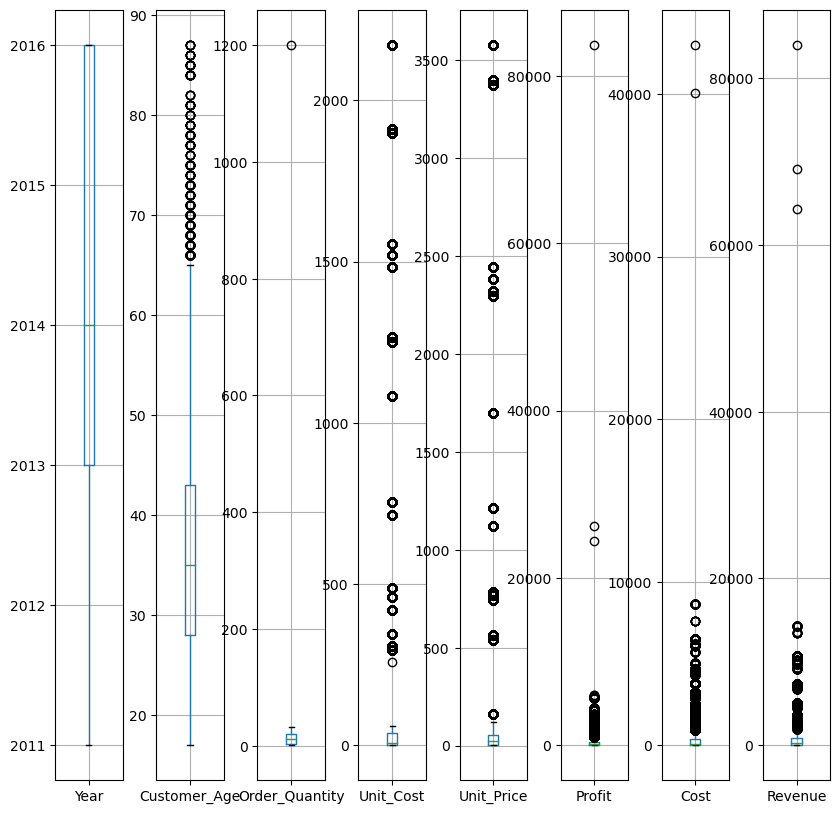

In [23]:
# Plot a box plot to visualize the outliers

# 8 subplots in one row
fig, ax = plt.subplots(1, 8, figsize=(10, 10))

# draw boxplots - for one column in each subplot
sales_data_na.boxplot('Year', ax=ax[0])
sales_data_na.boxplot('Customer_Age', ax=ax[1])
sales_data_na.boxplot('Order_Quantity', ax=ax[2])
sales_data_na.boxplot('Unit_Cost', ax=ax[3])
sales_data_na.boxplot('Unit_Price', ax=ax[4])
sales_data_na.boxplot('Profit', ax=ax[5])
sales_data_na.boxplot('Cost', ax=ax[6])
sales_data_na.boxplot('Revenue', ax=ax[7])

plt.subplots_adjust(wspace=0.5) 

plt.show()

In [24]:
#IQR score for Order_Quantity
Q1 = sales_data_na['Order_Quantity'].quantile(0.25)
Q3 = sales_data_na['Order_Quantity'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)
lower_limit,upper_limit

# find the outliers in Order_Quantity column
sales_data_na.loc[(sales_data_na['Order_Quantity'] > upper_limit) |(sales_data_na['Order_Quantity'] < lower_limit)]

,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
72770,March,2016,47,Adults (35-64),Male,United States,California,Clothing,Shorts,"Women's Mountain Shorts, S",1200,26,70,83688,312,84000


In [25]:
# trimming - delete the outliers data for Order_Quantity

new_sales_data_na = sales_data_na.loc[(sales_data_na['Order_Quantity'] < upper_limit) & (sales_data_na['Order_Quantity'] > lower_limit)]
print('before removing the Unit Price outliers:', len(sales_data_na))
print('after removing the Unit Price outliers:', len(new_sales_data_na))
print('outliers:', len(sales_data_na) - len(new_sales_data_na))

before removing the Unit Price outliers: 106807
after removing the Unit Price outliers: 106806
outliers: 1


# Part 4 : Data Visualization
   1. Import matplotlib
   2. Plot various chart for data visualization
   3. Find the relationship between the variable

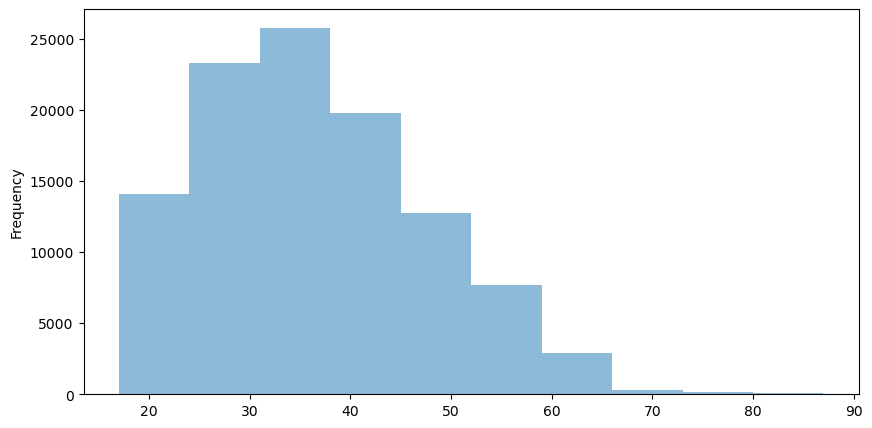

In [26]:
# customer age histogram

new_sales_data_na['Customer_Age'].plot(kind='hist', figsize=(10,5),alpha = 0.5, xlabel ='Number of customer') 

In [27]:
# Select the Age_Group variable using counts() function
new_sales_data_na['Age_Group'].value_counts()

Adults (35-64)          52982
Young Adults (25-34)    36077
Youth (<25)             17030
Seniors (64+)             717
Name: Age_Group, dtype: int64

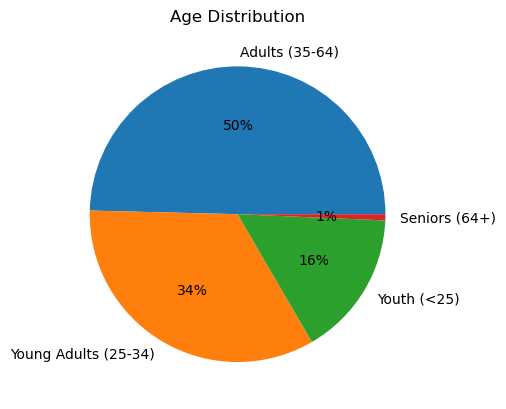

In [28]:
import matplotlib.pyplot as plt
import numpy as np

new_sales_data_na['Age_Group'].value_counts().plot(kind = "pie",autopct='%.0f%%',title = 'Age Distribution', ylabel='')

plt.show() 

In [29]:
#sales per year
new_sales_data_na["Year"].value_counts().sort_index()

2011     2473
2012     2191
2013    22883
2014    27745
2015    23314
2016    28200
Name: Year, dtype: int64

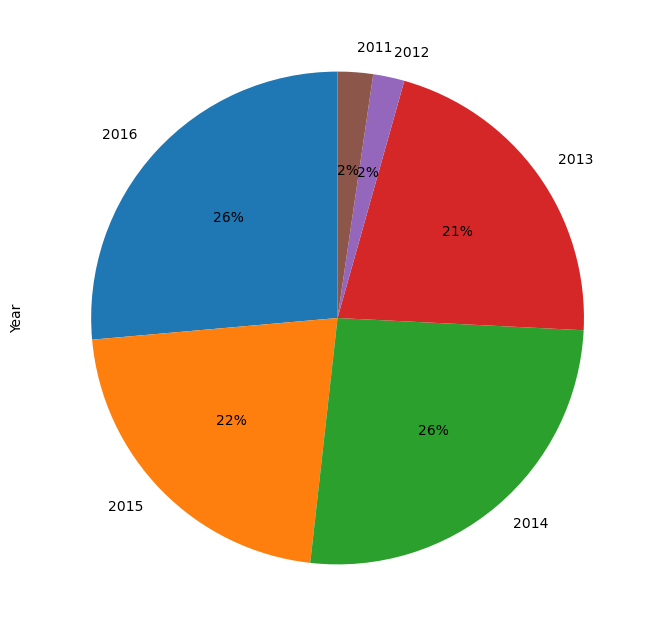

In [30]:
#pie chart sales per year
sales_year = new_sales_data_na['Year'].value_counts().sort_index(ascending = False)
sales_year.plot(kind='pie', figsize = (8,8), startangle = 90, autopct='%.0f%%')

In [31]:
print(new_sales_data_na.groupby('Year').sum()['Profit'].sort_values(ascending = False))

Year
2015    9277542
2016    8442164
2013    6835476
2014    6577261
2011    3752951
2012    3321598
Name: Profit, dtype: int64


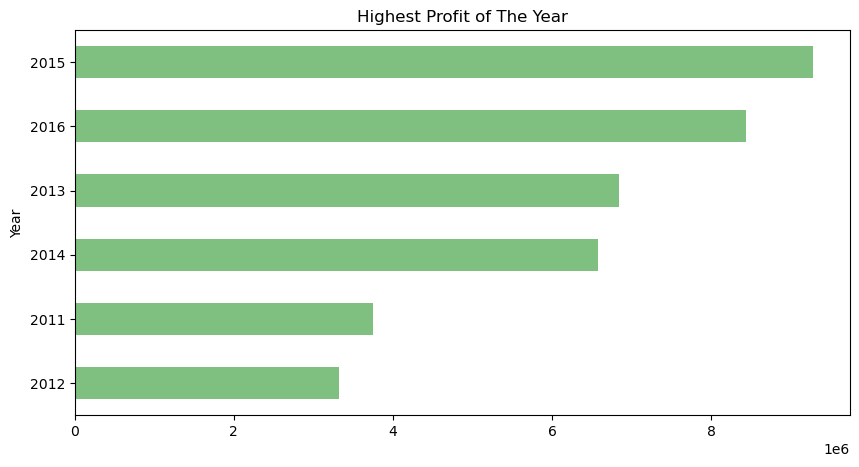

In [32]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create horizontal bar chart
new_sales_data_na.groupby('Year').sum()['Profit'].sort_values(ascending = True).plot(kind = 'barh', color= 'green',alpha = 0.5, figsize = (10,5), title = 'Highest Profit of The Year', xlabel='Year')

# Show the plot
plt.show() 

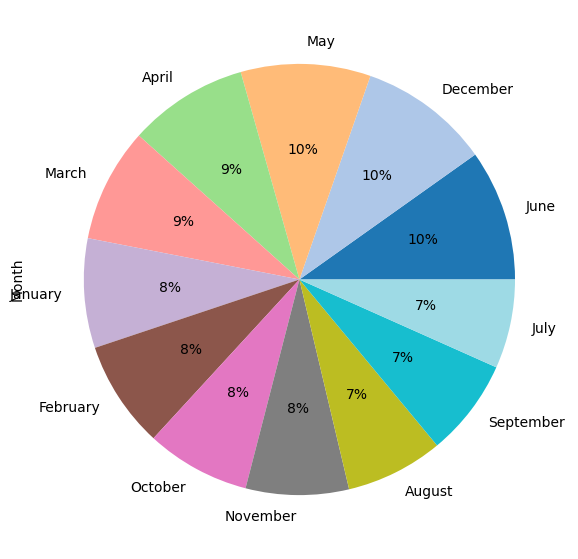

In [33]:
#sales per month bar plot
new_sales_data_na["Month"].value_counts().sort_values(ascending = False).plot(kind='pie', figsize = (7,7),autopct='%.0f%%',cmap='tab20')

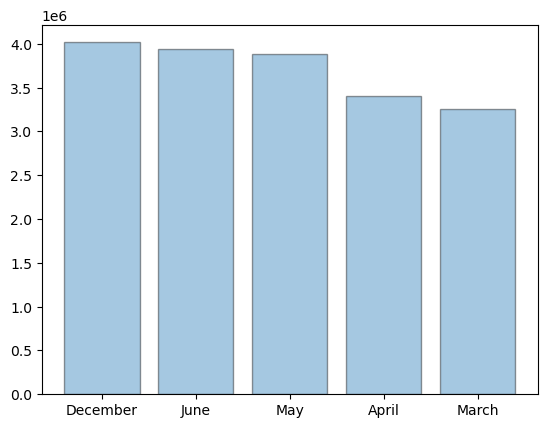

In [34]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create histogram 
Profitable_month = new_sales_data_na.groupby('Month').sum()['Profit'].sort_values(ascending = False).head(5)
plt.bar(Profitable_month.index,Profitable_month, alpha = 0.4, edgecolor='black')

# Show the plot
plt.show() 

In [35]:
new_sales_data_na.groupby('Customer_Gender').sum()['Order_Quantity'].sort_values(ascending = False)

Customer_Gender
Male      680136
Female    628183
Name: Order_Quantity, dtype: int64

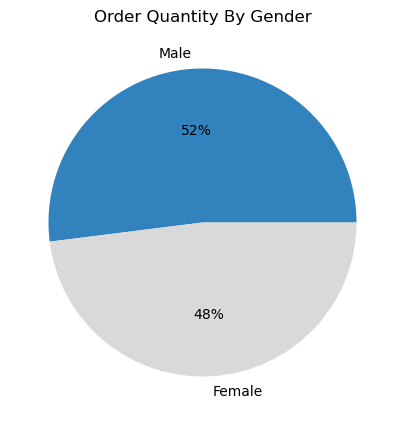

In [36]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create pie chart
new_sales_data_na.groupby('Customer_Gender').sum()['Order_Quantity'].sort_values(ascending = False).plot(kind = 'pie',autopct='%.0f%%',cmap='tab20c',
       figsize = (10,5), title = 'Order Quantity By Gender', ylabel='')

# show plot
plt.show()

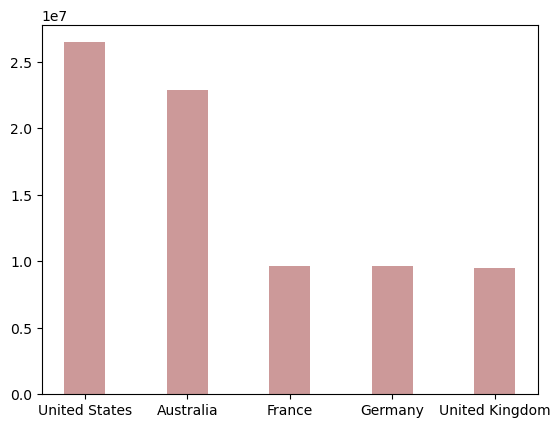

In [37]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create histogram 
HighestcountryRevenue = new_sales_data_na.groupby('Country').sum()['Revenue'].sort_values(ascending = False).head(5)
plt.bar(HighestcountryRevenue.index,HighestcountryRevenue, alpha = 0.4, color='maroon',width = 0.4)

# Show the plot
plt.show() 

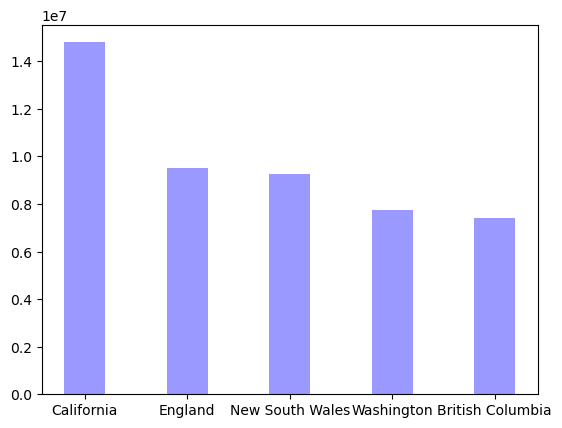

In [38]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create histogram 
HigheststateRevenue = new_sales_data_na.groupby('State').sum()['Revenue'].sort_values(ascending = False).head(5)
plt.bar(HigheststateRevenue.index,HigheststateRevenue, alpha = 0.4, color='blue',width = 0.4)

# Show the plot
plt.show() 

In [39]:
productCategory = new_sales_data_na.groupby('Product_Category').sum()['Profit'].sort_values(ascending = False)
print(productCategory)

Product_Category
Bikes          24247113
Accessories    10252378
Clothing        3707501
Name: Profit, dtype: int64


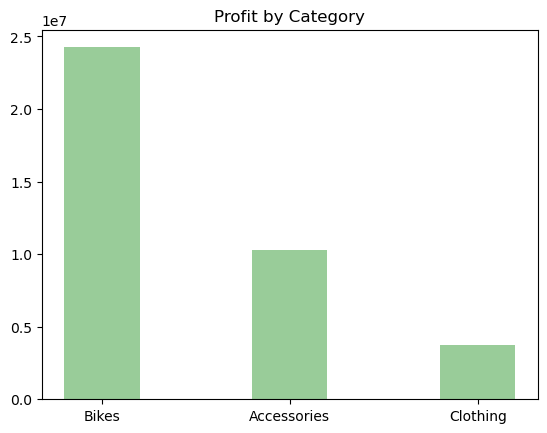

In [40]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create histogram 
Highestcategory = new_sales_data_na.groupby('Product_Category').sum()['Profit'].sort_values(ascending = False).head(5)
plt.bar(Highestcategory.index,Highestcategory, alpha = 0.4, color='green',width = 0.4)
plt.title('Profit by Category')

# Show the plot
plt.show() 

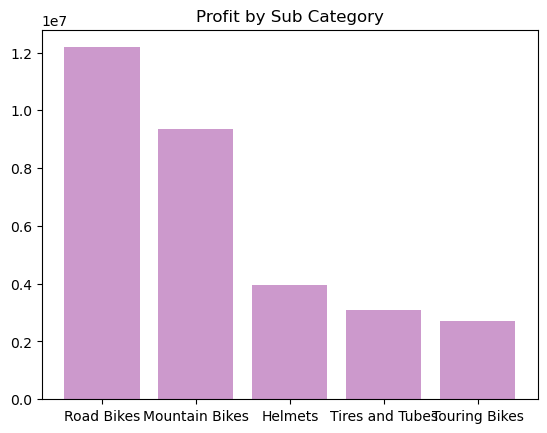

In [41]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create histogram 
Highestsubcategory = new_sales_data_na.groupby('Sub_Category').sum()['Profit'].sort_values(ascending = False).head(5)
plt.bar(Highestsubcategory.index,Highestsubcategory, alpha = 0.4, color='purple')
plt.title('Profit by Sub Category')

# Show the plot
plt.show() 

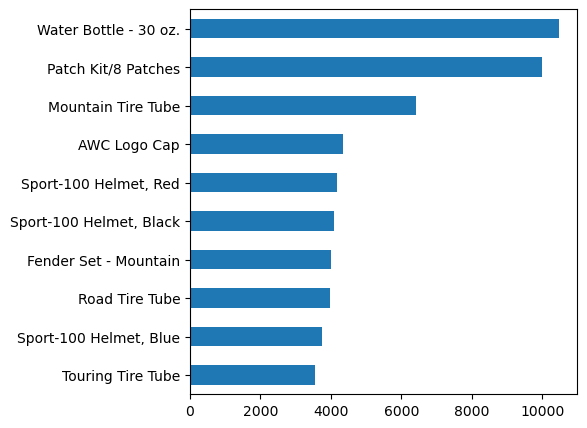

In [42]:
new_sales_data_na["Product"].value_counts().head(10).sort_values(ascending = True).plot(kind="barh", figsize = (5,5))

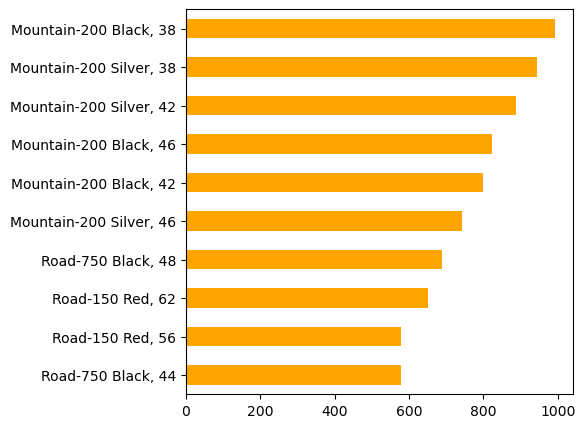

In [43]:
top_bikes = new_sales_data_na.loc[new_sales_data_na["Product_Category"] == "Bikes", "Product"].value_counts().head(10).sort_values(ascending = True)
top_bikes
top_bikes.plot(kind="barh", figsize=(5,5), color='orange')

In [44]:
cor = new_sales_data_na.corr().style.background_gradient(cmap='coolwarm')
cor

,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Year,1.000000,0.037111,0.111266,-0.207043,-0.203404,-0.184933,-0.202788,-0.197513
Customer_Age,0.037111,1.000000,0.023493,-0.015986,-0.014978,-0.003165,-0.011832,-0.008423
Order_Quantity,0.111266,0.023493,1.000000,-0.499868,-0.499928,-0.249350,-0.322639,-0.295992
Unit_Cost,-0.207043,-0.015986,-0.499868,1.000000,0.997916,0.783774,0.826813,0.817408
Unit_Price,-0.203404,-0.014978,-0.499928,0.997916,1.000000,0.790965,0.823451,0.818305
Profit,-0.184933,-0.003165,-0.249350,0.783774,0.790965,1.000000,0.959865,0.985592
Cost,-0.202788,-0.011832,-0.322639,0.826813,0.823451,0.959865,1.000000,0.993473
Revenue,-0.197513,-0.008423,-0.295992,0.817408,0.818305,0.985592,0.993473,1.000000


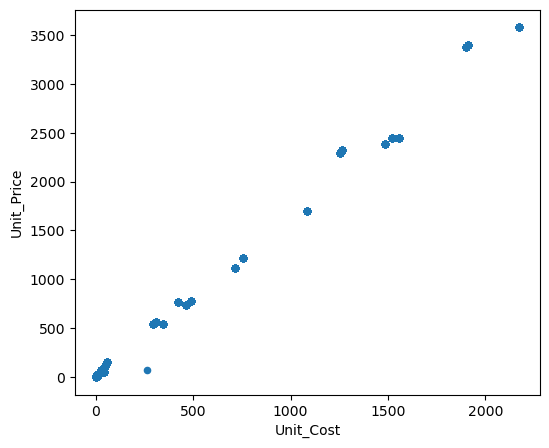

In [45]:
# Relationship between Unit Cost and Unit Price
new_sales_data_na.plot(x = "Unit_Cost", y = "Unit_Price", figsize = (6,5), kind = "scatter")

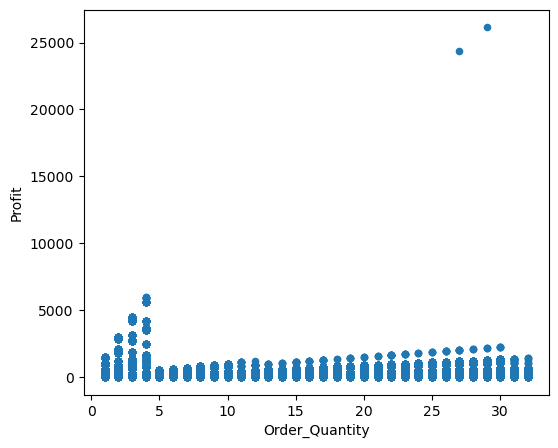

In [46]:
# Relationship between order quantity and profit
new_sales_data_na.plot(x = "Order_Quantity", y = "Profit", kind = "scatter", figsize = (6,5))

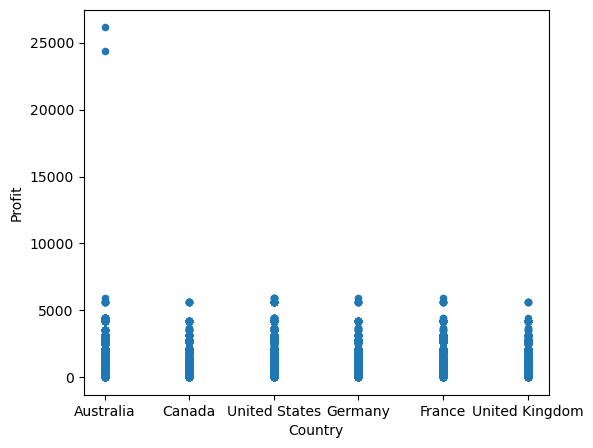

In [47]:
# Relationship between Profit and Country
new_sales_data_na.plot(x = "Country", y = "Profit", kind = "scatter", figsize = (6,5))

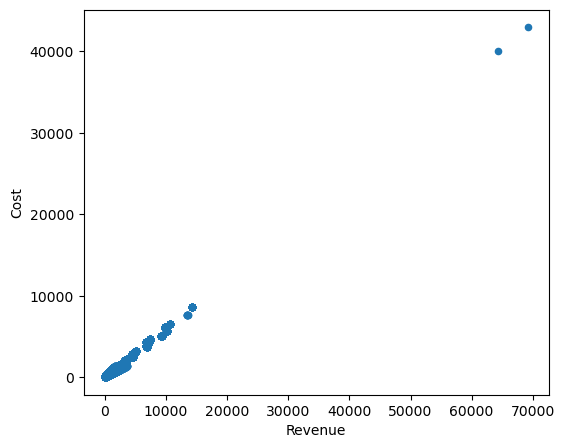

In [48]:
# Relationship between Revenue and Cost
new_sales_data_na.plot(x = "Revenue", y = "Cost", kind = "scatter", figsize = (6,5))

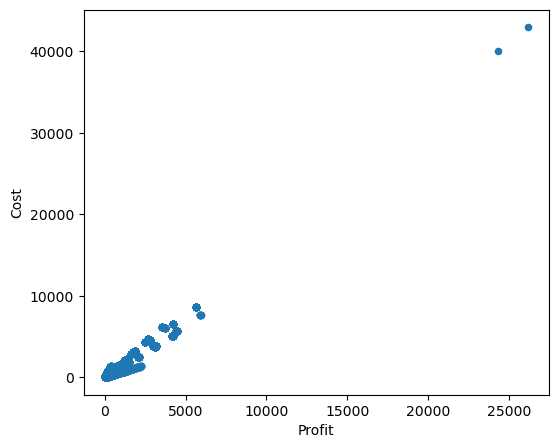

In [49]:
# Relationship between Profit and Cost
new_sales_data_na.plot(x = "Profit", y = "Cost", kind = "scatter", figsize = (6,5))

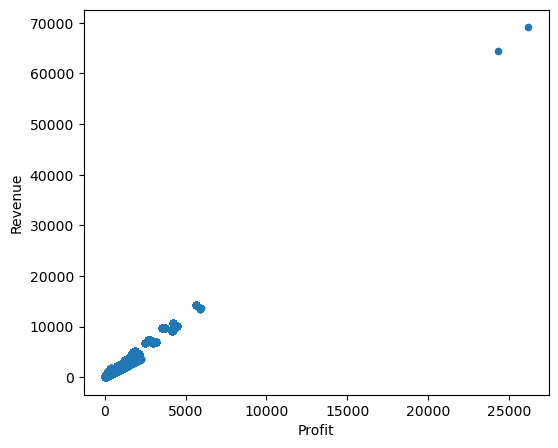

In [50]:
# Relationship between Profit and Revenue
new_sales_data_na.plot(x = "Profit", y = "Revenue", kind = "scatter", figsize = (6,5))